<a href="https://colab.research.google.com/github/rajiul123/Titanic_project/blob/main/titanic_project_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

In [340]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [341]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [342]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [343]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [344]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [345]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Observations
* The dataset has 12 columns and 891 rows
* There is three types of data in the dataset: Integer, Float and Object
* Age column has 177 missing values
* Cabin column 687 missing values
* Embark column has only two missing values
* From dataset description, we can assume that there is no outlier

# Handling Missing Values
* As Cabin column has lots of data missing (more than 50%), so we've to impute this column very carefully. I'm going to use mode to replace missing values
* In the Age column, we are going to impute using mean value to handle missing values
* In the Embark column, I'm going to imput with mode.

In [346]:
#Handling Age column's missing values
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())

In [347]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [348]:
df_train.Age.mean()

29.69911764705882

In [349]:
# Handling Cabin column's missing values
df_train["Cabin"].mode()

,Cabin
0,B96 B98
1,C23 C25 C27
2,G6


In [350]:
df_train["Cabin"].value_counts().head()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3


In [351]:
# As we are seeing that the modes of Cabin column are "B96 B98", "C23 C25 C27" and "G6".
# So we've to choose one between these values. We are going to pick first value
df_train["Cabin"] = df_train["Cabin"].fillna(df_train["Cabin"].mode()[0])

In [352]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [353]:
df_train["Cabin"].mode()

,Cabin
0,B96 B98


In [354]:
df_train["Cabin"].value_counts().head()

,count
Cabin,
B96 B98,691
G6,4
C23 C25 C27,4
C22 C26,3
F33,3


In [355]:
# Handling Embarked column's missing values
df_train["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [356]:
df_train["Embarked"].mode()

,Embarked
0,S


In [357]:
# Here we are seeing that maximim number of passengers embarked from S.
# So we are going to fill the missing values with S
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analisys

In [358]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [359]:
# Checking Survival status
df_train["Survived"].value_counts()

,count
Survived,
0,549
1,342


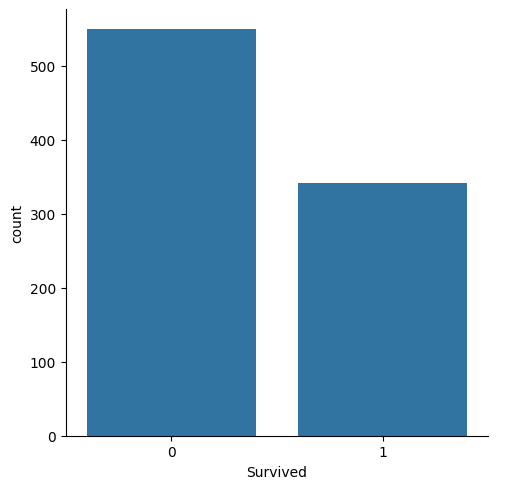

In [360]:
sns.catplot(x="Survived", data=df_train, kind="count");

In [361]:
# Checking Age
df_train["Person"] = df_train.Sex
df_train.loc[df_train["Age"] < 18, "Person"] = "Child"
print(df_train["Person"].value_counts())

Person
male      519
female    259
Child     113
Name: count, dtype: int64


In [362]:
bins = [0, 18, 40, 60]
labels = ["Young", "Middle_aged", "Old"]
df_train["Age_group"] = pd.cut(df_train["Age"], bins=bins, labels=labels)
df_train["Age_group"].value_counts()

,count
Age_group,
Middle_aged,602
Young,139
Old,128


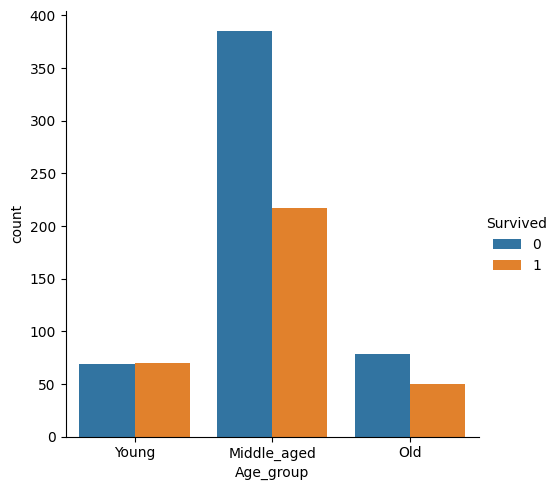

In [363]:
sns.catplot(x="Age_group", hue="Survived", data=df_train, kind="count");

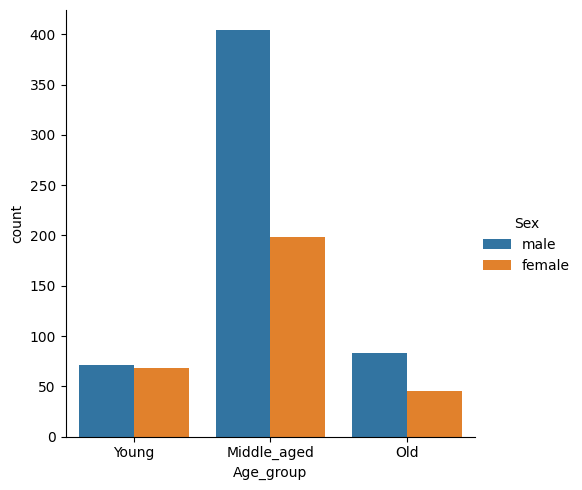

In [364]:
sns.catplot(x="Age_group", hue="Sex", data=df_train, kind="count");

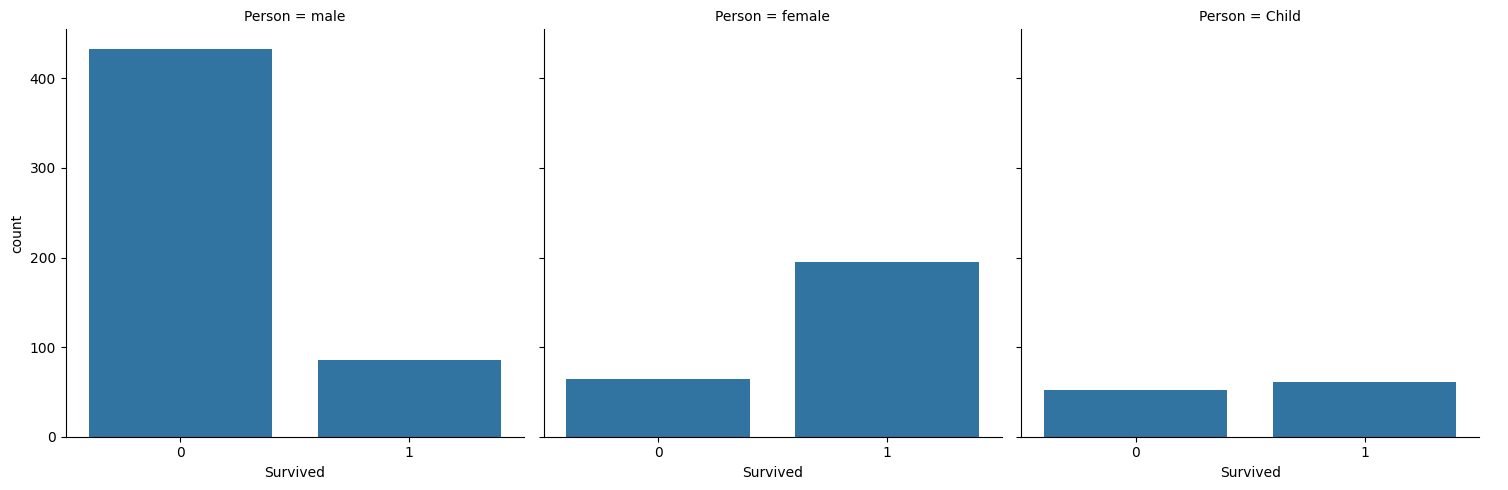

In [365]:
sns.catplot(x="Survived", col="Person", data=df_train, kind="count");

In [366]:
# Checking Sex column to know the passengers status
df_train["Person"].value_counts()

,count
Person,
male,519
female,259
Child,113


In [367]:
df_train.groupby("Survived")["Person"].value_counts()

Survived  Person
0         male      433
          female     64
          Child      52
1         female    195
          male       86
          Child      61
Name: count, dtype: int64

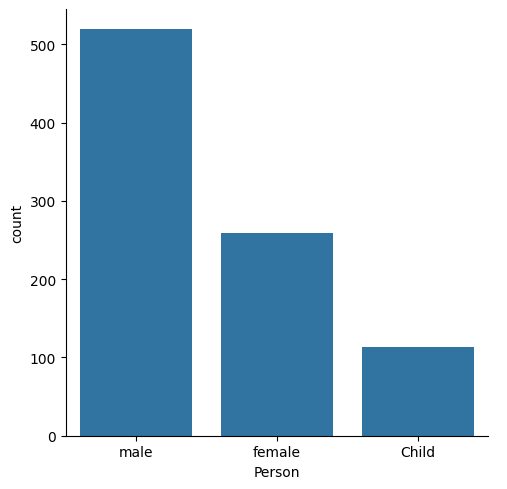

In [368]:
sns.catplot(x="Person", data=df_train, kind="count");

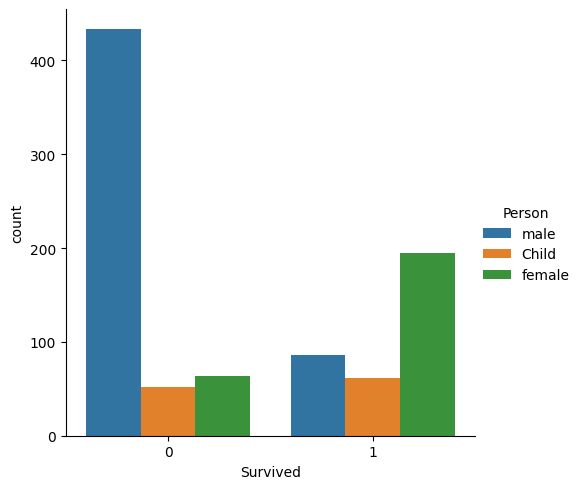

In [369]:
sns.catplot(x="Survived", hue="Person", data=df_train, kind="count");

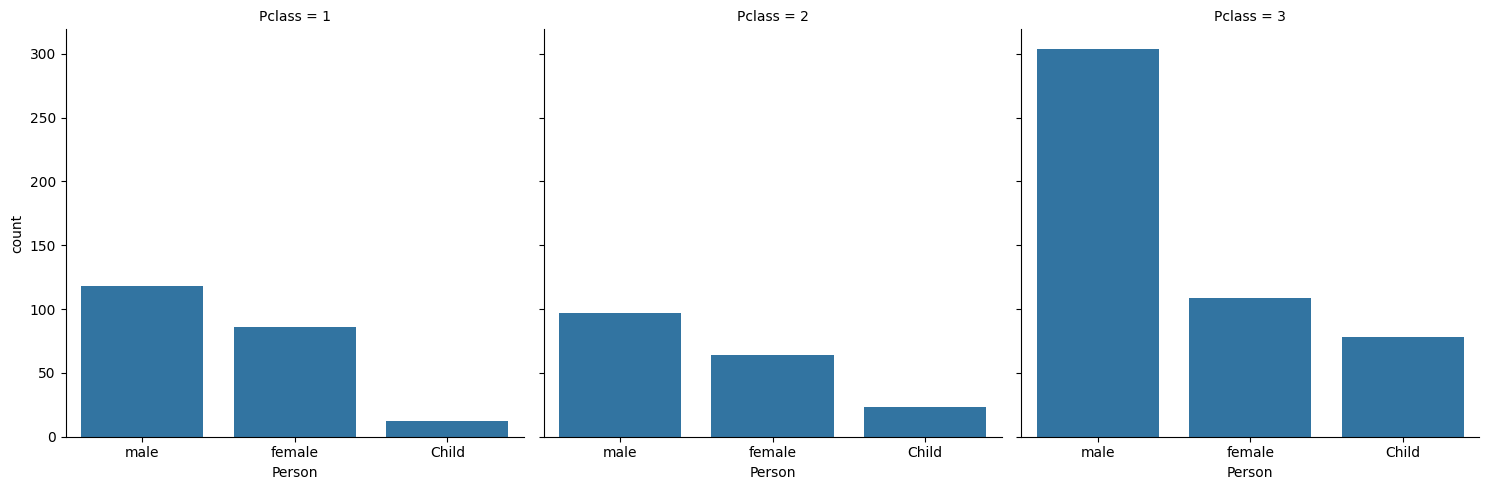

In [370]:
sns.catplot(x="Person", col="Pclass", data=df_train, kind="count");

In [371]:
df_train["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


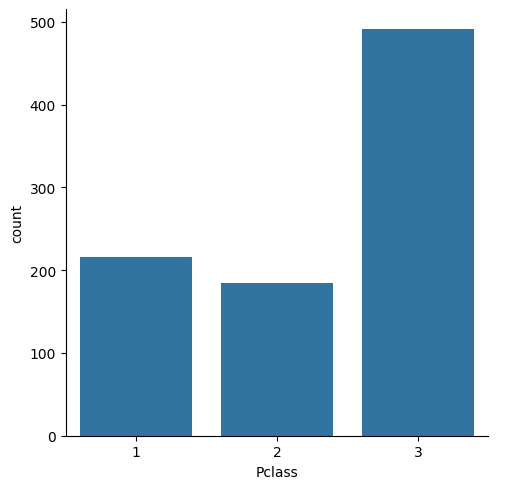

In [372]:
sns.catplot(x="Pclass", data=df_train, kind="count");

In [373]:
df_train.groupby("Survived")["Pclass"].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: count, dtype: int64

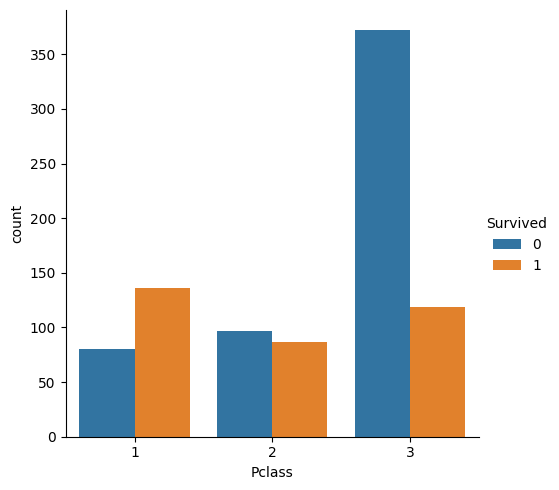

In [374]:
sns.catplot(x="Pclass", hue="Survived", data=df_train, kind="count");

In [375]:
# Checking SibSp column
df_train["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


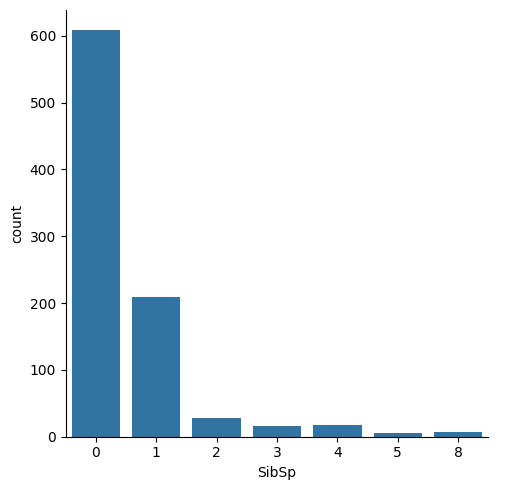

In [376]:
sns.catplot(x=df_train["SibSp"], data=df_train, kind="count");

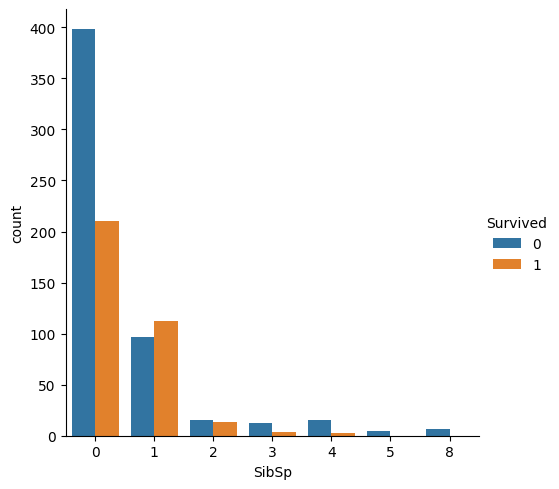

In [377]:
sns.catplot(x=df_train["SibSp"], hue="Survived", data=df_train, kind="count");

In [378]:
# Checking Parch column
df_train["Parch"].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


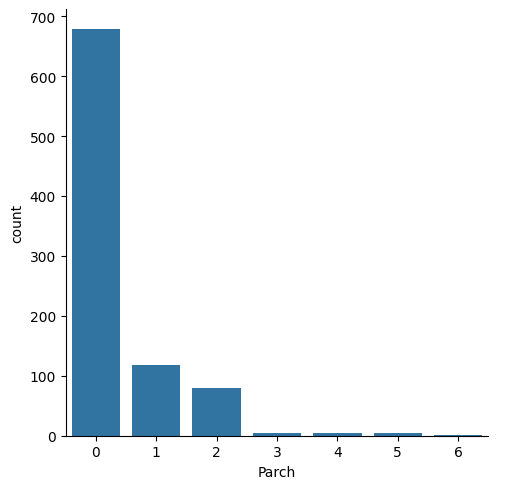

In [379]:
sns.catplot(x=df_train["Parch"], data=df_train, kind="count");

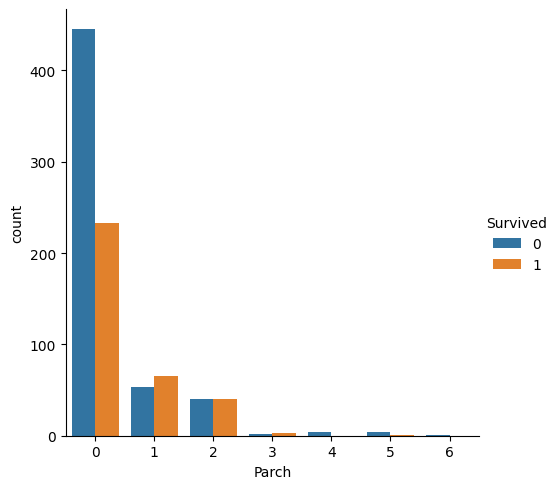

In [380]:
sns.catplot(x=df_train["Parch"], hue="Survived", data=df_train, kind="count");

In [381]:
# Checking Embarked
df_train["Embarked"].value_counts()

,count
Embarked,
S,646
C,168
Q,77


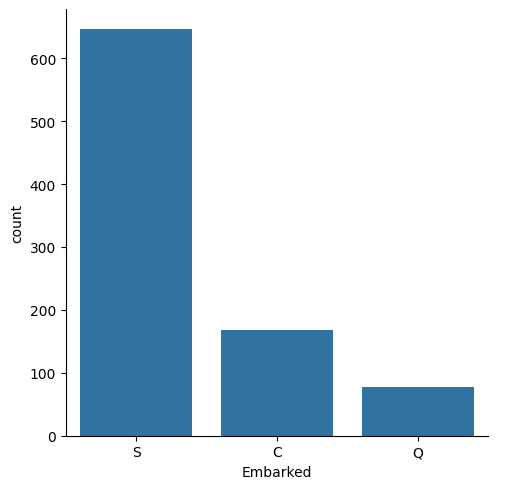

In [382]:
sns.catplot(x="Embarked", data=df_train, kind="count");

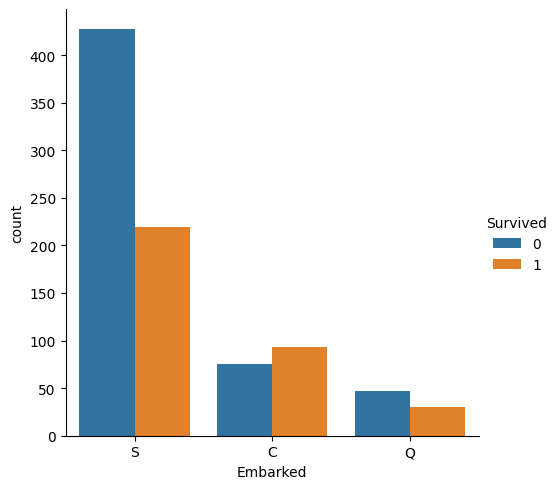

In [383]:
sns.catplot(x="Embarked", hue="Survived", data=df_train, kind="count");

# Observations
* Maximum passengers died in the disaster
* The ship had more male passengers than femal passengers
* It seems male passengers died more than female passengers
* Maximum passengers were on 3rd class
* It seems the passengers who were on 3rd class, died most
* 1st class passengers survived most
* Maximum passengers were middle aged
* Middle Aged passengers died most in the disaster
* Maximum passengers were from S
* Passengers who were from S, died most

# Model Building

In [384]:
X = df_train.drop(columns=["Survived"])
y = df_train["Survived"]

In [385]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Age_group
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,male,Middle_aged
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Middle_aged
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,female,Middle_aged
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Middle_aged
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,male,Middle_aged


In [386]:
X.drop(columns=["Name", "Person", "Age_group", "Ticket"], inplace=True)

In [387]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,B96 B98,S
1,2,1,female,38.0,1,0,71.2833,C85,C
2,3,3,female,26.0,0,0,7.9250,B96 B98,S
3,4,1,female,35.0,1,0,53.1000,C123,S
4,5,3,male,35.0,0,0,8.0500,B96 B98,S


In [388]:
# habdling Sex column
dummies_sex = pd.get_dummies(X["Sex"], dtype=int)
dummies_sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [389]:
X = pd.concat([X, dummies_sex], axis=1)
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,1,3,male,22.0,1,0,7.2500,B96 B98,S,0,1
1,2,1,female,38.0,1,0,71.2833,C85,C,1,0
2,3,3,female,26.0,0,0,7.9250,B96 B98,S,1,0
3,4,1,female,35.0,1,0,53.1000,C123,S,1,0
4,5,3,male,35.0,0,0,8.0500,B96 B98,S,0,1


In [390]:
X.drop(columns=["Sex"], inplace=True)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,1,3,22.0,1,0,7.2500,B96 B98,S,0,1
1,2,1,38.0,1,0,71.2833,C85,C,1,0
2,3,3,26.0,0,0,7.9250,B96 B98,S,1,0
3,4,1,35.0,1,0,53.1000,C123,S,1,0
4,5,3,35.0,0,0,8.0500,B96 B98,S,0,1


In [391]:
# Handling Embarked
dummies_embarked = pd.get_dummies(X["Embarked"], dtype=int)
dummies_embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [392]:
X = pd.concat([X, dummies_embarked], axis=1)
X.drop(columns=["Embarked"], inplace=True)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S
0,1,3,22.0,1,0,7.2500,B96 B98,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,C85,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,B96 B98,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,C123,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,B96 B98,0,1,0,0,1


In [393]:
# Handling Cabin
X["Cabin_only"] = X["Cabin"].str.slice(0, 1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S,Cabin_only
0,1,3,22.0,1,0,7.2500,B96 B98,0,1,0,0,1,B
1,2,1,38.0,1,0,71.2833,C85,1,0,1,0,0,C
2,3,3,26.0,0,0,7.9250,B96 B98,1,0,0,0,1,B
3,4,1,35.0,1,0,53.1000,C123,1,0,0,0,1,C
4,5,3,35.0,0,0,8.0500,B96 B98,0,1,0,0,1,B


In [394]:
X["Cabin_only"].value_counts()

,count
Cabin_only,
B,734
C,59
D,33
E,32
A,15
F,13
G,4
T,1


In [395]:
X.drop(columns=["Cabin"], inplace=True)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_only
0,1,3,22.0,1,0,7.2500,0,1,0,0,1,B
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,C
2,3,3,26.0,0,0,7.9250,1,0,0,0,1,B
3,4,1,35.0,1,0,53.1000,1,0,0,0,1,C
4,5,3,35.0,0,0,8.0500,0,1,0,0,1,B


In [396]:
dummies_cabin = pd.get_dummies(X["Cabin_only"], dtype=int)
dummies_cabin.head()

,A,B,C,D,E,F,G,T
0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [397]:
X = pd.concat([X, dummies_cabin], axis=1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_only,A,B,C,D,E,F,G,T
0,1,3,22.0,1,0,7.2500,0,1,0,0,1,B,0,1,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,C,0,0,1,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1,B,0,1,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,1,C,0,0,1,0,0,0,0,0
4,5,3,35.0,0,0,8.0500,0,1,0,0,1,B,0,1,0,0,0,0,0,0


In [398]:
X.drop(columns=["Cabin_only"], inplace=True)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,A,B,C,D,E,F,G,T
0,1,3,22.0,1,0,7.2500,0,1,0,0,1,0,1,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0,0
4,5,3,35.0,0,0,8.0500,0,1,0,0,1,0,1,0,0,0,0,0,0


In [399]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 19), (179, 19), (712,), (179,))

# Logistic Regression

In [401]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [402]:
y_pred_lr = lr.predict(X_test)

In [403]:
lr.score(X_train, y_train)

0.8174157303370787

In [404]:
accuracy_score(y_test, y_pred_lr)

0.7988826815642458

In [432]:
cm_l = confusion_matrix(y_test, y_pred_lr)

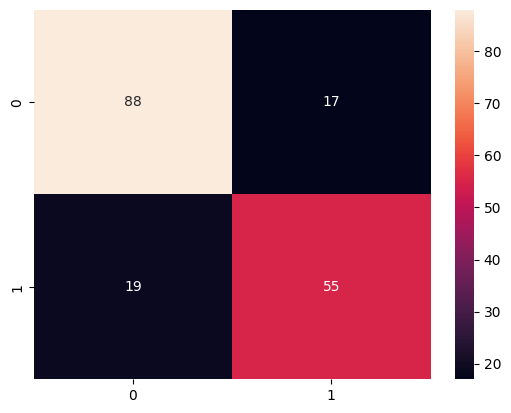

In [434]:
sns.heatmap(cm_l, annot=True);

In [406]:
report_lr = classification_report(y_test, y_pred_lr)
print(report_lr)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Random Forest

In [407]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [413]:
y_pred_rf = rf.predict(X_test)

In [414]:
rf.score(X_train, y_train)

1.0

In [415]:
accuracy_score(y_test, y_pred_rf)

0.8156424581005587

In [424]:
cm = confusion_matrix(y_test, y_pred_rf)

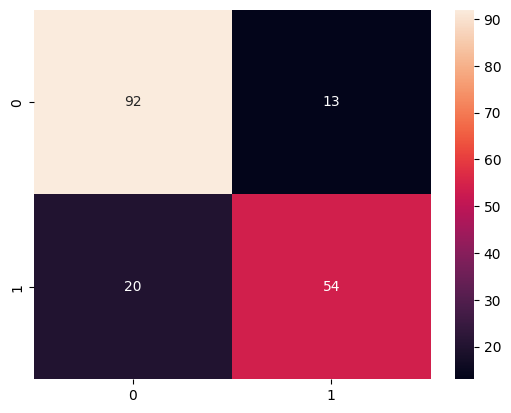

In [426]:
sns.heatmap(cm, annot=True);

In [417]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



# Decison Tree

In [418]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [419]:
y_pred_dt = dt.predict(X_test)

In [420]:
dt.score(X_train, y_train)

1.0

In [421]:
accuracy_score(y_test, y_pred_dt)

0.7374301675977654

In [430]:
cm_d = confusion_matrix(y_test, y_pred_dt)

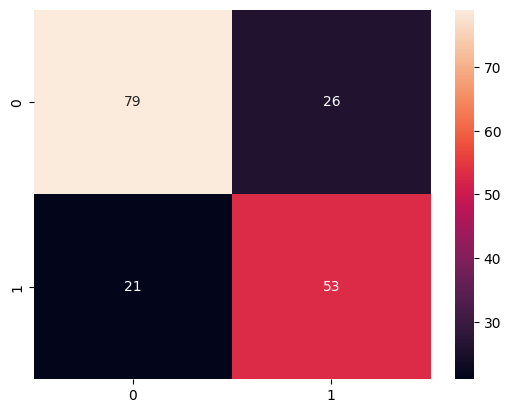

In [431]:
sns.heatmap(cm_d, annot=True);

In [423]:
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       105
           1       0.67      0.72      0.69        74

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

